Loading data.npy and constructing X (11 variables)...
X shape: (400000, 11) (after mask)
Calculating partial-derivative sensitivity matrix...
Calculation complete.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18612\2810167522.py:147: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df < vmin, "0", df.applymap(lambda x: f"{x:.3f}")


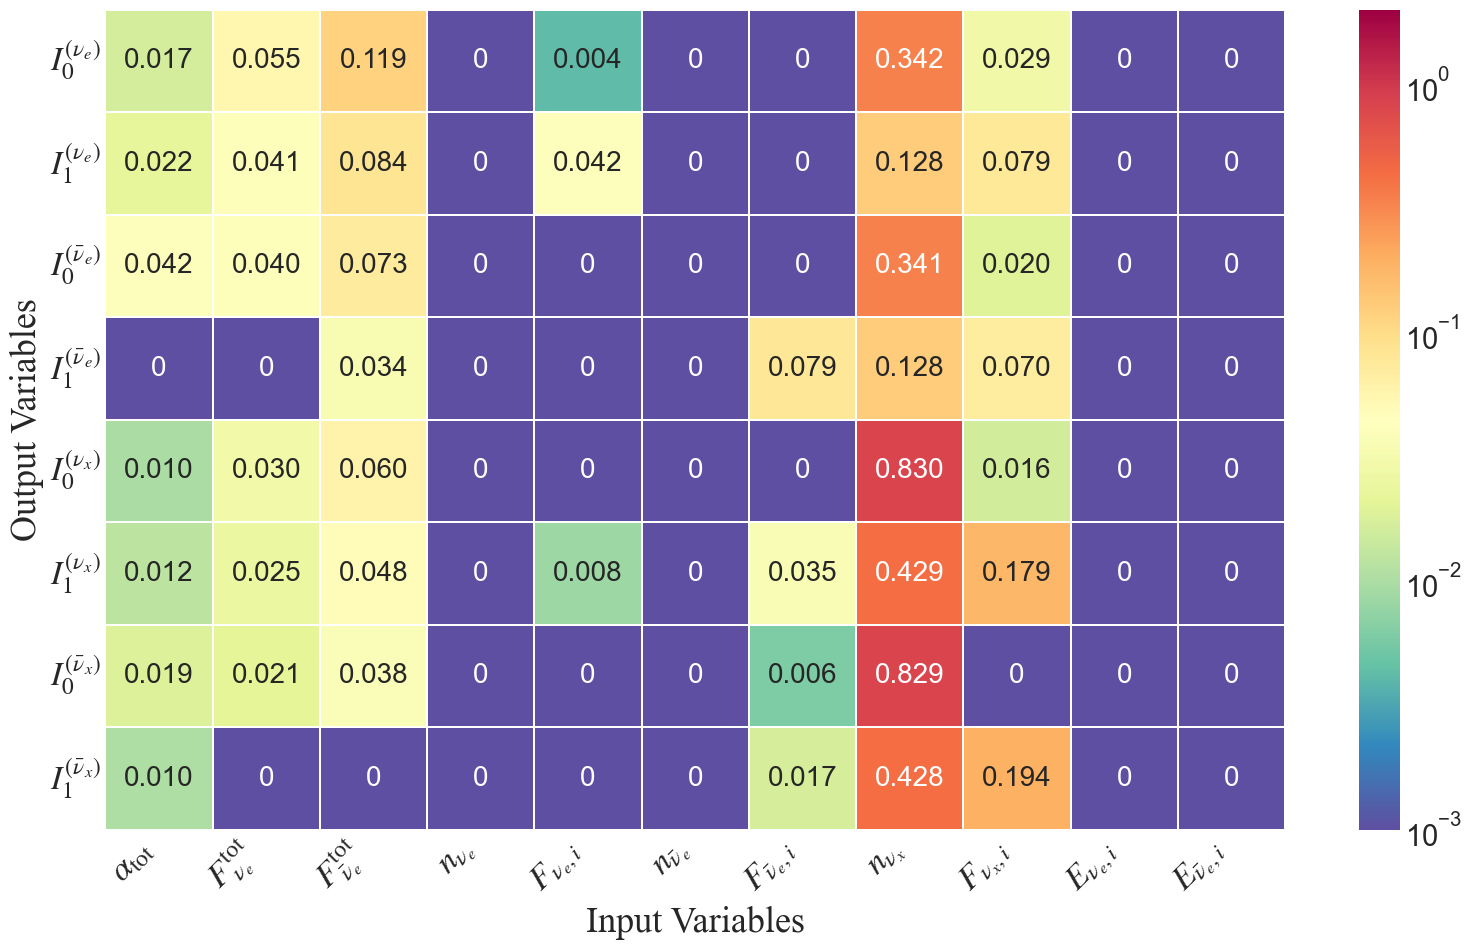

In [ ]:
# ==== imports & matplotlib config ====
from matplotlib.ticker import LogFormatterMathtext
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sympy
import matplotlib.colors as mcolors
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'stix'
plt.style.use('seaborn-v0_8-whitegrid')


x_labels = [
    r'$\alpha_{\mathrm{tot}}$', r'$F_{\nu_e}^{\mathrm{tot}}$', r'$F_{\bar\nu_e}^{\mathrm{tot}}$',
    r'$n_{\nu_e}$', r'$F_{\nu_e,i}$', r'$n_{\bar\nu_e}$', r'$F_{\bar\nu_e,i}$',
    r'$n_{\nu_x}$', r'$F_{\nu_x,i}$', r'$E_{\nu_e,i}$', r'$E_{\bar{\nu}_e,i}$'
]
y_labels = [
    r'$I_0^{(\nu_e)}$', r'$I_1^{(\nu_e)}$', r'$I_0^{(\bar{\nu}_e)}$', r'$I_1^{(\bar{\nu}_e)}$',
    r'$I_0^{(\nu_x)}$', r'$I_1^{(\nu_x)}$', r'$I_0^{(\bar{\nu}_x)}$', r'$I_1^{(\bar{\nu}_x)}$'
]


analytic_model_data = {
    "equations": [
        "0.01241420581936836 + -0.002117913216352463*(x_0) + -0.02494936436414719*(x_1) + 0.06446751952171326*(x_2) + 0.1757289320230484*(x_7) + -0.01204259134829044*(x_8) + 0.01775183342397213*(cos(1*x_0)) + -0.01836088299751282*(sin(1*x_1)) + 0.03000439517199993*(cos(1*x_1)) + 0.04919640347361565*(sin(1*x_2)) + -0.02737060934305191*(cos(1*x_2)) + 0.01438299380242825*(cos(1*x_4)) + 0.1637067198753357*(sin(1*x_7)) + -0.04283741116523743*(cos(1*x_7)) + -0.0100325345993042*(sin(1*x_8)) + 0.01875980943441391*(cos(1*x_8))",
        "-0.01183282118290663*(x_0) + -0.02140488103032112*(x_1) + 0.04156730324029922*(x_2) + 0.03697246313095093*(x_4) + 0.0649663582444191*(x_7) + 0.0400463193655014*(x_8) + 0.03172977641224861*(sin(1*x_0)) + 0.01450894586741924*(cos(1*x_0)) + -0.01657970622181892*(sin(1*x_1)) + 0.01089741289615631*(cos(1*x_1)) + 0.03049828298389912*(sin(1*x_2)) + -0.03025093860924244*(cos(1*x_2)) + -0.01659289374947548*(cos(1*x_4)) + 0.060410525649786*(sin(1*x_7)) + -0.02311142906546593*(cos(1*x_7)) + 0.03407220914959908*(sin(1*x_8)) + -0.02153494954109192*(cos(1*x_8))",
        "0.01304310653358698 + 0.03257213905453682*(x_0) + -0.01719197072088718*(x_1) + 0.04154916852712631*(x_2) + 0.1753832846879959*(x_7) + -0.007032220251858234*(x_8) + -0.01115224324166775*(cos(1*x_0)) + -0.01252586487680674*(sin(1*x_1)) + 0.02553923800587654*(cos(1*x_1)) + 0.0322573259472847*(sin(1*x_2)) + -0.01155612617731094*(cos(1*x_2)) + 0.1633910834789276*(sin(1*x_7)) + -0.04207539558410645*(cos(1*x_7)) + -0.005692305974662304*(sin(1*x_8)) + 0.01715747639536858*(cos(1*x_8))",
        "-0.008519868366420269 + 0.01433029770851135*(x_2) + 0.03904183208942413*(x_6) + 0.1282543241977692*(x_7) + 0.04077894985675812*(x_8) + 0.009779419749975204*(sin(1*x_2)) + -0.01961527392268181*(cos(1*x_2)) + 0.03430794179439545*(sin(1*x_6)) + -0.02534656785428524*(cos(1*x_6)) + 0.03465219959616661*(sin(1*x_8))",
        "0.02392888814210892 + 0.02155822515487671*(x_0) + 0.02131500095129013*(x_1) + -0.02157253958284855*(x_2) + 0.4255918860435486*(x_7) + 0.01413246989250183*(x_8) + 0.01473644748330116*(cos(1*x_0)) + 0.01797835156321526*(sin(1*x_1)) + 0.0139476340264082*(cos(1*x_1)) + -0.01327594369649887*(sin(1*x_2)) + 0.04318141937255859*(cos(1*x_2)) + 0.3964470028877258*(sin(1*x_7)) + -0.1099837645888329*(cos(1*x_7)) + 0.0128313172608614*(sin(1*x_8)) + 0.01909418404102325*(cos(1*x_8))",
        "0.003707504365593195 + 0.00728239119052887*(x_0) + 0.01375501230359077*(x_1) + -0.02296057716012001*(x_2) + -0.004675422795116901*(x_4) + 0.01861210353672504*(x_6) + 0.2187130302190781*(x_7) + 0.0935116708278656*(x_8) + -0.02070346847176552*(sin(1*x_0)) + -0.006497363559901714*(cos(1*x_0)) + 0.01077940315008163*(sin(1*x_1)) + -0.004515238106250763*(cos(1*x_1)) + -0.01657587662339211*(sin(1*x_2)) + 0.0196235291659832*(cos(1*x_2)) + 0.01252313144505024*(cos(1*x_4)) + 0.01996176689863205*(sin(1*x_6)) + 0.00322936475276947*(cos(1*x_6)) + 0.2036512494087219*(sin(1*x_7)) + -0.06538808345794678*(cos(1*x_7)) + 0.07945287227630615*(sin(1*x_8)) + -0.04079661518335342*(cos(1*x_8))",
        "0.003472147742286325 + 0.01230495423078537*(x_0) + 0.01173620950430632*(x_1) + -0.0178266316652298*(x_2) + 0.8293629884719849*(x_7) + -0.007648033555597067*(cos(1*x_0)) + 0.009025946259498596*(sin(1*x_1)) + -0.003800563514232635*(cos(1*x_1)) + -0.01292282715439796*(sin(1*x_2)) + 0.01581070944666862*(cos(1*x_2)) + 0.006629761774092913*(sin(1*x_6)) + -0.0001553129404783249*(cos(1*x_6))",
        "0.002868870506063104 + 0.00730467215180397*(x_0) + 0.009037570096552372*(x_6) + 0.2184859961271286*(x_7) + 0.1009173914790154*(x_8) + -0.009633119218051434*(sin(1*x_0)) + -0.005288737826049328*(cos(1*x_0)) + 0.01222929265350103*(sin(1*x_6)) + 0.007786382455378771*(cos(1*x_6)) + 0.2034096866846085*(sin(1*x_7)) + -0.06623747944831848*(cos(1*x_7)) + 0.08538690954446793*(sin(1*x_8)) + -0.0458223894238472*(cos(1*x_8))"
    ],
    "variables": ["x_0", "x_1","x_2","x_3","x_4","x_5","x_6","x_7","x_8", "x_9","x_10"]
}


def compute_energy_np(F_i, F_total):

    F_total_safe = np.where(F_total > 0, F_total, np.nan)
    ratio = np.divide(F_i, F_total_safe)
    E = 70.0 - 60.0 * np.sqrt(ratio)

    E = np.where(np.isfinite(E), E, np.nan)

    E = np.clip(E, 0.0, 60.0)
    return E

def build_inputs_from_npy(npy_path):

    print("Loading data.npy and constructing X (11 variables)...")
    data = np.load(npy_path)


    X9 = data[:, :9].astype(np.float64)


    F_nue_total = data[:, 1].astype(np.float64)
    F_nue_i     = data[:, 4].astype(np.float64)
    F_nueb_total= data[:, 2].astype(np.float64)
    F_nueb_i    = data[:, 6].astype(np.float64)

    E_nue_i_ori  = compute_energy_np(F_nue_i,  F_nue_total)   
    E_nueb_i_ori = compute_energy_np(F_nueb_i, F_nueb_total)  


    mask = np.isfinite(E_nue_i_ori) & np.isfinite(E_nueb_i_ori)
    X9 = X9[mask]
    E_nue_i_ori  = E_nue_i_ori[mask]
    E_nueb_i_ori = E_nueb_i_ori[mask]


    X = np.concatenate([X9, E_nue_i_ori[:, None], E_nueb_i_ori[:, None]], axis=1)


    X_df = pd.DataFrame(X, columns=x_labels)
    print(f"X shape: {X_df.shape} (after mask)")
    return X_df

def calculate_partial_sensitivity_matrix_from_sym(analytic_data, X_df, output_vars, input_vars,
                                                  aggregate="mean_abs"):

    print("Calculating partial-derivative sensitivity matrix...")

    
    sym_vars = sympy.symbols(analytic_data['variables'])
    exprs = [sympy.sympify(eq) for eq in analytic_data['equations']]

    
    args = [X_df[col].values for col in input_vars]

    sens_df = pd.DataFrame(0.0, index=output_vars, columns=input_vars, dtype=np.float64)

    for i, expr in enumerate(exprs):
        for j, sym in enumerate(sym_vars):
            d_expr = sympy.diff(expr, sym)                        
            d_func = sympy.lambdify(sym_vars, d_expr, 'numpy')    
            d_val = d_func(*args)                                  

            if np.isscalar(d_val):
                contrib = abs(float(d_val))
            else:
                d_val = np.asarray(d_val, dtype=np.float64)
                d_val = d_val[np.isfinite(d_val)]
                if d_val.size == 0:
                    contrib = 0.0
                else:
                    if aggregate == "mean_abs":
                        contrib = float(np.mean(np.abs(d_val)))
                    elif aggregate == "rms":
                        contrib = float(np.sqrt(np.mean(np.square(d_val))))
                    else:
                        contrib = float(np.mean(np.abs(d_val)))

            sens_df.iloc[i, j] = contrib

    print("Calculation complete.")
    return sens_df



def plot_heatmap_optimized(
    df,
    title,
    filename="MI_Heatmap.pdf",   
    figsize=(16, 10),
    title_fontsize=26,
    label_fontsize=26,
    tick_fontsize=24,
    annot_fontsize=20,
    colorbar_tick_fontsize=21,
    cmap='Spectral_r',
    vmin=1e-3,
    vmax=2
):
    fig, ax = plt.subplots(figsize=figsize)
    annot_matrix = np.where(
        df < vmin, "0", df.applymap(lambda x: f"{x:.3f}")
    )
    df_for_plot = df.clip(lower=vmin)
    ticks = [1e-3, 1e-2, 1e-1, 1e0]
    if vmax > ticks[-1]:
        ticks.append(vmax)
    cbar_kws = {
        "shrink": 1,
        "ticks": ticks,
        "format": LogFormatterMathtext(base=10),
    }
    heatmap = sns.heatmap(
        df_for_plot, annot=annot_matrix, fmt='', cmap=cmap,
        norm=mcolors.LogNorm(vmin=vmin, vmax=vmax),
        linewidths=.15, ax=ax, cbar_kws=cbar_kws,
        annot_kws={"size": annot_fontsize}
    )
    # ax.set_title(title, fontsize=title_fontsize, fontname='Times New Roman', pad=20)
    ax.set_xlabel('Input Variables', fontsize=label_fontsize, fontname='Times New Roman')
    ax.set_ylabel('Output Variables', fontsize=label_fontsize, fontname='Times New Roman')
    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=colorbar_tick_fontsize)
    plt.xticks(rotation=45, ha='right', fontsize=tick_fontsize)
    plt.yticks(rotation=0, fontsize=tick_fontsize)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(filename, format='pdf', bbox_inches='tight', dpi=300)
    plt.show()


X_df = build_inputs_from_npy("data.npy")


sens_matrix_df = calculate_partial_sensitivity_matrix_from_sym(
    analytic_model_data,  
    X_df,
    y_labels,
    x_labels,
    aggregate="mean_abs"  
)


plot_heatmap_optimized(
    sens_matrix_df,
    'Mutual Information between Inputs and Outputs',  
    filename="P_Heatmap.pdf"
)
